In [ ]:
from google.colab import files

# This will prompt you to select a file to upload
uploaded = files.upload()

# After upload, save kaggle.json to the proper location
import shutil
import os

if 'kaggle.json' in uploaded:
    os.makedirs('/root/.kaggle', exist_ok=True)
    shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
    os.chmod('/root/.kaggle/kaggle.json', 0o600)
    print("kaggle.json uploaded and permissions set!")
else:
    print("Please upload kaggle.json file.")

Saving kaggle.json to kaggle.json
kaggle.json uploaded and permissions set!


In [ ]:
# Download the dataset
!kaggle datasets download -d openfoodfacts/world-food-facts --unzip -p ./data

Dataset URL: https://www.kaggle.com/datasets/openfoodfacts/world-food-facts
License(s): DbCL-1.0
  0% 0.00/109M [00:00<?, ?B/s]
100% 109M/109M [00:00<00:00, 1.41GB/s]


In [ ]:
# Load the already converted CSV
df = pd.read_csv('en.openfoodfacts.products.csv', low_memory=False)

# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head()


 Shape: (356027, 163)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Load the already converted CSV
df = pd.read_csv('en.openfoodfacts.products.csv', low_memory=False)

# Keep only relevant columns
df = df[['product_name', 'ingredients_text','categories','carbon-footprint_100g', 'countries_en']]

# Drop rows where product_name is missing
df = df.dropna(subset=['product_name'])

# Save the cleaned file (optional)
df.to_csv('openfoodfacts_cleaned.csv', index=False)

print("Cleaned dataset saved as 'openfoodfacts_cleaned.csv'")


Cleaned dataset saved as 'openfoodfacts_cleaned.csv'


In [ ]:
df = pd.read_csv('openfoodfacts_cleaned.csv', low_memory=False)

# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head(30)





 Shape: (338515, 5)


,product_name,ingredients_text,categories,carbon-footprint_100g,countries_en
0,Farine de blé noir,NaN,NaN,NaN,France
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,United States
2,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,United States
3,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,United States
4,Organic Polenta,Organic polenta,NaN,NaN,United States
5,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,United States
6,Organic Long Grain White Rice,Organic long grain white rice,NaN,NaN,United States
7,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",NaN,NaN,United States
8,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",NaN,NaN,United States
9,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",NaN,NaN,United States


In [ ]:

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
product_name                  0
ingredients_text          56418
categories               236354
carbon-footprint_100g    338238
countries_en                219
dtype: int64


In [ ]:
import pandas as pd

# Load the already converted CSV
df = pd.read_csv('en.openfoodfacts.products.csv', low_memory=False)

# Keep only relevant columns
df = df[['product_name', 'ingredients_text', 'countries_en']]

# Drop rows where product_name is missing
df = df.dropna(subset=['product_name'])

# Save the cleaned file (optional)
df.to_csv('openfoodfacts_products.csv', index=False)

print("Cleaned dataset saved as 'openfoodfacts_products.csv'")

Cleaned dataset saved as 'openfoodfacts_products.csv'


In [ ]:
df = pd.read_csv('openfoodfacts_products.csv', low_memory=False)

# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head(20)



 Shape: (338515, 3)


,product_name,ingredients_text,countries_en
0,Farine de blé noir,NaN,France
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",United States
2,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",United States
3,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",United States
4,Organic Polenta,Organic polenta,United States
5,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",United States
6,Organic Long Grain White Rice,Organic long grain white rice,United States
7,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",United States
8,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",United States
9,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",United States


In [ ]:
!pip install langdetect
import pandas as pd
from langdetect import detect
from tqdm import tqdm

# Load product data
products_df = pd.read_csv("openfoodfacts_products.csv")
products_df = products_df.dropna(subset=["product_name"])  # Drop rows with missing names

# Setup tqdm progress bar
tqdm.pandas()

# Detect language
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply language detection
products_df['is_english'] = products_df['product_name'].progress_apply(is_english)

# Filter only English product names
english_products_df = products_df[products_df['is_english'] == True].copy()

# Save the filtered dataset
english_products_df.to_csv("english_products_only.csv", index=False)

print(f" Done! Saved {len(english_products_df)} English-only products to 'english_products_only.csv'")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 50.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=048db2e3df6bba064410552479f51744f49a5dc095a3c99886e69a4b8d3507e3
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


100%|██████████| 338515/338515 [36:41<00:00, 153.80it/s]


 Done! Saved 134197 English-only products to 'english_products_only.csv'


In [ ]:
df = pd.read_csv('english_products_only.csv', low_memory=False)

# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head(20)



 Shape: (134197, 4)


,product_name,ingredients_text,countries_en,is_english
0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",United States,True
1,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",United States,True
2,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",United States,True
3,Organic Long Grain White Rice,Organic long grain white rice,United States,True
4,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",United States,True
5,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",United States,True
6,Organic Penne Pasta,Organic refined durum semolina wheat flour,United States,True
7,Cinnamon Nut Granola,"Organic rolled oats, honey, raisins, almonds, ...",United States,True
8,Organic Sweetened Banana Chips,"Organic bananas, organic coconut oil, organic ...",United States,True
9,Lotus Organic Brown Jasmine Rice,Organic brown jasmine rice,United States,True


In [ ]:
import pandas as pd

# df = pd.read_csv('CPC_Ver_2_1_english_structure.txt', sep='\t', encoding='latin-1', low_memory=False)

df.to_csv('CPC_codes.csv', index=False)

print("Converted to CSV and saved as 'CPC_codes.csv'")


Converted to CSV and saved as 'CPC_codes.csv'


In [ ]:
import pandas as pd


df = pd.read_csv('CPC_codes.csv', names=["raw"], header=None)

# Tách thành hai cột: code và description
df[['code', 'CPC_description']] = df['raw'].str.extract(r'^(\d+),\"(.+?)\"')


df = df.dropna(subset=['code', 'CPC_description'])


df.to_csv('CPC_codes_cleaned.csv', index=False)

print("Done! Saved as 'CPC_codes_cleaned.csv'")


/tmp/ipython-input-18-3274699169.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CPC_codes.csv', names=["raw"], header=None)


Done! Saved as 'CPC_codes_cleaned.csv'


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Cleaned_Sectors.csv")

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns.tolist())

['CPC_description']


In [ ]:
food_keywords = [
    "cultivation", "agriculture", "wheat", "rice", "maize", "vegetables", "fruit", "nuts",
    "oil seeds", "sugar", "animal", "meat", "fish", "dairy", "milk", "poultry",
    "eggs", "butchery", "food", "farming", "cereal", "oats", "beverages", "bread",
    "bakery", "processed", "slaughtering", "livestock"
]
# Filter food-related CPC entries
df = pd.read_csv("/content/drive/My Drive/Cleaned_Sectors.csv")#file from sectors in MRIO data
food_cpc_df = df[
    df['CPC_description'].str.lower().apply(
        lambda desc: any(keyword in desc for keyword in food_keywords)
    )
].reset_index(drop=True)

candidate_labels = food_cpc_df['CPC_description'].dropna().tolist()

food_cpc_df.to_csv("food_CPC_descriptions.csv", index=False)


In [ ]:
import pandas as pd

#cleanning
df = pd.read_csv("food_CPC_descriptions.csv")

#
df['CPC_description'] = (
    df['CPC_description']
    .astype(str)
    .str.replace(r"[\{\}']", "", regex=True)
    .str.strip()  )


print(df.head(10))


df.to_csv("Cleaned_food_CPC.csv", index=False)

                          CPC_description
0               Cultivation of paddy rice
1                    Cultivation of wheat
2        Cultivation of cereal grains nec
3  Cultivation of vegetables, fruit, nuts
4                Cultivation of oil seeds
5   Cultivation of sugar cane, sugar beet
6       Cultivation of plant-based fibers
7                Cultivation of crops nec
8                          Cattle farming
9                            Pigs farming


In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import gc

# Load CPC descriptions
cpc_df = pd.read_csv("Cleaned_food_CPC.csv")  # Column: 'CPC_description'
cpc_df.columns = cpc_df.columns.str.strip()
candidate_labels = cpc_df['CPC_description'].dropna().tolist()

# Load product data (translated product names)
products_df = pd.read_csv("english_products_only.csv")
products_df = products_df.dropna(subset=["product_name"]).head(500)


# Initialize the zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

# Enable tqdm for progress
tqdm.pandas()

# Function to classify a product name
def classify_product(text):
    try:
        result = classifier(text, candidate_labels, multi_label=False)
        return result['labels'][0]  # Top predicted CPC description
    except Exception as e:
        return None

gc.collect()

# Apply classification to all product names
products_df = products_df.dropna(subset=["product_name"])
products_df["MRIO_CPC_description"] = products_df["product_name"].progress_apply(classify_product)

# Save result
products_df.to_csv("products_MRIO_description.csv", index=False)
print("Done! Saved to 'products_MRIO_description.csv'")


Device set to use cuda:0
100%|██████████| 500/500 [05:10<00:00,  1.61it/s]

Done! Saved to 'products_MRIO_description.csv'


In [ ]:
df = pd.read_csv("products_MRIO_description.csv")
df.head(10)


,product_name,ingredients_text,countries_en,is_english,MRIO_CPC_description
0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",United States,True,Processing of Food products nec
1,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",United States,True,Processing of Food products nec
2,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",United States,True,Cultivation of cereal grains nec
3,Organic Long Grain White Rice,Organic long grain white rice,United States,True,Cultivation of cereal grains nec
4,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",United States,True,Manufacture of beverages
5,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",United States,True,Cultivation of oil seeds
6,Organic Penne Pasta,Organic refined durum semolina wheat flour,United States,True,Processing of Food products nec
7,Cinnamon Nut Granola,"Organic rolled oats, honey, raisins, almonds, ...",United States,True,Cultivation of cereal grains nec
8,Organic Sweetened Banana Chips,"Organic bananas, organic coconut oil, organic ...",United States,True,Processing of Food products nec
9,Lotus Organic Brown Jasmine Rice,Organic brown jasmine rice,United States,True,Cultivation of cereal grains nec


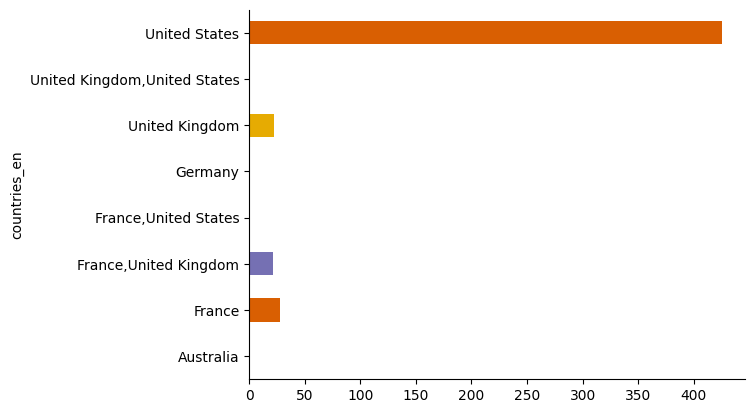

In [ ]:
# @title countries_en

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('countries_en').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'drive', 'sample_data']


In [ ]:
!ls -lh /content/FoodData_Central_csv_2025-04-24.zip


ls: cannot access '/content/FoodData_Central_csv_2025-04-24.zip': No such file or directory


In [7]:
!unzip -o /content/FoodData_Central_csv_2025-04-24.zip -d fdc_data


Archive:  /content/FoodData_Central_csv_2025-04-24.zip
   creating: fdc_data/FoodData_Central_csv_2025-04-24/
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/food_update_log_entry.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/sr_legacy_food.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/agricultural_samples.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/Download API Field Descriptions.xlsx  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/food_nutrient_source.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/fndds_ingredient_nutrient_value.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/input_food.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/food_attribute_type.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/lab_method_code.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/measure_unit.csv  
  inflating: fdc_data/FoodData_Central_csv_2025-04-24/food_nutrient_conversion_factor.

In [8]:
import os
csv_dir = 'fdc_data/FoodData_Central_csv_2025-04-24'
print([f for f in os.listdir(csv_dir) if f.endswith('.csv')])


['food_calorie_conversion_factor.csv', 'foundation_food.csv', 'fndds_derivation.csv', 'food.csv', 'lab_method.csv', 'sr_legacy_food.csv', 'branded_food.csv', 'food_attribute.csv', 'food_nutrient_derivation.csv', 'food_attribute_type.csv', 'retention_factor.csv', 'nutrient.csv', 'lab_method_code.csv', 'food_update_log_entry.csv', 'food_nutrient_source.csv', 'food_component.csv', 'agricultural_samples.csv', 'input_food.csv', 'measure_unit.csv', 'food_nutrient_conversion_factor.csv', 'sub_sample_food.csv', 'fndds_ingredient_nutrient_value.csv', 'lab_method_nutrient.csv', 'sample_food.csv', 'food_protein_conversion_factor.csv', 'market_acquisition.csv', 'wweia_food_category.csv', 'survey_fndds_food.csv', 'acquisition_samples.csv', 'sub_sample_result.csv', 'food_category.csv', 'microbe.csv', 'food_nutrient.csv', 'food_portion.csv']


In [9]:
import pandas as pd

foods = pd.read_csv(f'{csv_dir}/food.csv', low_memory=False)
categories = pd.read_csv(f'{csv_dir}/food_category.csv', low_memory=False)

print("foods:", foods.shape)
print(foods.columns)
print("categories:", categories.shape)
print(categories.columns)
foods.head(10)
categories.head(10)


foods: (2064912, 5)
Index(['fdc_id', 'data_type', 'description', 'food_category_id',
       'publication_date'],
      dtype='object')
categories: (28, 3)
Index(['id', 'code', 'description'], dtype='object')


,id,code,description
0,1,100,Dairy and Egg Products
1,2,200,Spices and Herbs
2,3,300,Baby Foods
3,4,400,Fats and Oils
4,5,500,Poultry Products
5,6,600,"Soups, Sauces, and Gravies"
6,7,700,Sausages and Luncheon Meats
7,8,800,Breakfast Cereals
8,9,900,Fruits and Fruit Juices
9,10,1000,Pork Products


In [11]:
import pandas as pd

products_df = pd.read_csv('/content/drive/My Drive/products_MRIO_description (3).csv')
# or, if local:
# products_df = pd.read_csv('/content/products_MRIO_description (3).csv')

products_df = products_df.dropna(subset=['product_name'])
products_df['product_name'] = products_df['product_name'].astype(str)


In [18]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd

# Use your already-loaded dataframes:
# products_df['product_name'], foods['description']

# Remove NaN and convert to string
products_df = products_df.dropna(subset=['product_name'])
products_df['product_name'] = products_df['product_name'].astype(str)
foods = foods.dropna(subset=['description'])
foods['description'] = foods['description'].astype(str)

# Use a compact, fast model (MiniLM is good)
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

# Compute embeddings for FDC descriptions (all at once, on GPU)
fdc_texts = foods['description'].tolist()
fdc_emb = model.encode(fdc_texts, show_progress_bar=True, device='cuda', batch_size=256, convert_to_numpy=True)

# Build a FAISS index (cosine similarity)
dimension = fdc_emb.shape[1]
index = faiss.IndexFlatIP(dimension)  # Inner product = cosine if normalized
faiss.normalize_L2(fdc_emb)  # Normalize to unit length
index.add(fdc_emb)

# Compute product embeddings
product_texts = products_df['product_name'].tolist()
product_emb = model.encode(product_texts, show_progress_bar=True, device='cuda', batch_size=256, convert_to_numpy=True)
faiss.normalize_L2(product_emb)

# For each product, find top 1 nearest neighbor in FDC
D, I = index.search(product_emb, 1)  # Returns distances and indices

# Map results back
products_df['fdc_match_idx'] = I.flatten()
products_df['fdc_match_score'] = D.flatten()
products_df['fdc_description'] = [fdc_texts[i] for i in I.flatten()]
products_df['fdc_id'] = [foods.iloc[i]['fdc_id'] for i in I.flatten()]
products_df['fdc_category_id'] = [foods.iloc[i]['food_category_id'] for i in I.flatten()]

print(products_df[['product_name', 'fdc_description', 'fdc_match_score']].head(10))


/tmp/ipython-input-18-425364543.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods['description'] = foods['description'].astype(str)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/8067 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

                        product_name  \
0     Banana Chips Sweetened (Whole)   
1             Organic Salted Nut Mix   
2  Breadshop Honey Gone Nuts Granola   
3      Organic Long Grain White Rice   
4       Organic Dark Chocolate Minis   
5              Organic Sunflower Oil   
6                Organic Penne Pasta   
7               Cinnamon Nut Granola   
8     Organic Sweetened Banana Chips   
9   Lotus Organic Brown Jasmine Rice   

                             fdc_description  fdc_match_score  
0                   BANANA CHIPS (SWEETENED)         0.951536  
1                            ORGANIC NUT MIX         0.907850  
2              TOPS, HONEY GONE NUTS GRANOLA         0.843339  
3              ORGANIC LONG GRAIN WHITE RICE         1.000000  
4                       DARK CHOCOLATE MINIS         0.851520  
5                      ORGANIC SUNFLOWER OIL         1.000000  
6                        ORGANIC PENNE PASTA         1.000001  
7                           CINNAMON GRANOLA   

In [20]:
# Convert both columns to string, then to Int64 (nullable integer) to safely handle NaN
products_df['fdc_category_id'] = pd.to_numeric(products_df['fdc_category_id'], errors='coerce').astype('Int64')
categories['id'] = pd.to_numeric(categories['id'], errors='coerce').astype('Int64')

# Now merge
products_df = products_df.merge(categories, left_on='fdc_category_id', right_on='id', how='left', suffixes=('', '_category'))

# Rename
products_df.rename(columns={'description_category': 'usda_food_category'}, inplace=True)



In [27]:
print(products_df.columns)


Index(['product_name', 'ingredients_text', 'countries_en', 'is_english',
       'MRIO_CPC_description', 'fdc_match_idx', 'fdc_match_score',
       'fdc_description', 'fdc_id', 'fdc_category_id', 'id', 'code',
       'usda_food_category', 'id_category', 'code_category',
       'description_category', 'id_category', 'code_category',
       'usda_food_category', 'id_category', 'code_category',
       'usda_food_category', 'id_category', 'code_category',
       'usda_food_category'],
      dtype='object')


In [29]:
# Get column indices for all 'usda_food_category' columns
usda_cat_indices = [i for i, col in enumerate(products_df.columns) if col == 'usda_food_category']

print(f"Found at positions: {usda_cat_indices}")
# Preview first three values for each candidate column
for idx in usda_cat_indices:
    print(f"\nPreview for column at position {idx}:")
    print(products_df.iloc[:, idx].dropna().unique()[:3])

# Pick the index that makes sense (e.g. the first non-empty, or the one with the expected values)
chosen_idx = usda_cat_indices[0]  # Change 0, 1, 2, ... after you inspect output
unique_cats = sorted(products_df.iloc[:, chosen_idx].dropna().astype(str).unique())

lca_template = pd.DataFrame({
    'usda_food_category': unique_cats,
    'co2_kg_per_kg': [None] * len(unique_cats),
    'land_use_m2_per_kg': [None] * len(unique_cats),
})
lca_template.to_csv('lca_coeffs_template.csv', index=False)
print("✅ Saved template: lca_coeffs_template.csv")
print(lca_template.head(10))


Found at positions: [12, 18, 21, 24]

Preview for column at position 12:
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']

Preview for column at position 18:
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']

Preview for column at position 21:
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']

Preview for column at position 24:
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']
✅ Saved template: lca_coeffs_template.csv
                  usda_food_category co2_kg_per_kg land_use_m2_per_kg
0                      Fats and Oils          None               None
1        Legumes and Legume Products          None               None
2  Vegetables and Vegetable Products          None               None


In [30]:
import pandas as pd

lca_df = pd.read_csv('/content/Environmental impacts of food (Clark et al. 2022).csv')
print(lca_df[['Entity', 'ghg_kg', 'land_use_kg']].head())


          Entity    ghg_kg  land_use_kg
0            Ale  0.488690     0.811485
1  Almond butter  0.387011     7.683045
2    Almond milk  0.655888     1.370106
3        Almonds  0.602368     8.230927
4    Apple juice  0.458378     0.660629


In [33]:
category_cols = [i for i, c in enumerate(products_df.columns) if "usda_food_category" in c]
for idx in category_cols:
    print(f"Column position {idx} ({products_df.columns[idx]}):")
    col_vals = products_df.iloc[:, idx].dropna().astype(str).unique()[:5]
    print(col_vals)


Column position 12 (usda_food_category):
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']
Column position 18 (usda_food_category):
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']
Column position 21 (usda_food_category):
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']
Column position 24 (usda_food_category):
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']
Column position 25 (usda_food_category_final):
['Legumes and Legume Products' 'Fats and Oils'
 'Vegetables and Vegetable Products']


In [34]:
# 1. Assign your food category column for mapping (position 25, zero-indexed)
products_df['usda_food_category_final'] = products_df.iloc[:, 25]

# 2. Run the auto-mapping as before (assumes 'mapping' was built from previous step)
products_df['lca_food_group'] = products_df['usda_food_category_final'].map(mapping)

# 3. Merge with Clark et al. 2022 LCA values
lca_df_simple = lca_df[['Entity', 'ghg_kg', 'land_use_kg']].drop_duplicates(subset=['Entity']).set_index('Entity')
products_df = products_df.join(lca_df_simple, on='lca_food_group')

products_df.rename(columns={
    'ghg_kg': 'co2_kg_per_kg',
    'land_use_kg': 'land_use_m2_per_kg',
}, inplace=True)

# 4. Show result
print(products_df[['product_name', 'usda_food_category_final', 'lca_food_group', 'co2_kg_per_kg', 'land_use_m2_per_kg']].head(10))

# 5. Save as CSV
products_df.to_csv('products_with_clark2022_lca.csv', index=False)


                        product_name usda_food_category_final lca_food_group  \
0     Banana Chips Sweetened (Whole)                      NaN            NaN   
1             Organic Salted Nut Mix                      NaN            NaN   
2  Breadshop Honey Gone Nuts Granola                      NaN            NaN   
3      Organic Long Grain White Rice                      NaN            NaN   
4       Organic Dark Chocolate Minis                      NaN            NaN   
5              Organic Sunflower Oil                      NaN            NaN   
6                Organic Penne Pasta                      NaN            NaN   
7               Cinnamon Nut Granola                      NaN            NaN   
8     Organic Sweetened Banana Chips                      NaN            NaN   
9   Lotus Organic Brown Jasmine Rice                      NaN            NaN   

   co2_kg_per_kg  co2_kg_per_kg  land_use_m2_per_kg  land_use_m2_per_kg  
0            NaN            NaN              

In [31]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

# Load your Clark et al. 2022 LCA data
lca_df = pd.read_csv('/content/Environmental impacts of food (Clark et al. 2022).csv')
clark_entities = lca_df['Entity'].dropna().unique().tolist()

# Your USDA food categories (pick the correct column, here example index 12)
category_col_idx = 12  # Update as needed!
usda_categories = products_df.iloc[:, category_col_idx].dropna().unique().tolist()

# Load a fast, small embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings
entity_emb = model.encode(clark_entities, convert_to_numpy=True, show_progress_bar=True)
usda_emb = model.encode(usda_categories, convert_to_numpy=True, show_progress_bar=True)

# Compute cosine similarity
def best_match(emb, candidates, candidate_emb):
    sim = np.dot(candidate_emb, emb) / (np.linalg.norm(candidate_emb, axis=1) * np.linalg.norm(emb) + 1e-8)
    best_idx = np.argmax(sim)
    return candidates[best_idx], sim[best_idx]

# Map each USDA category to its best-matching Clark entity
mapping = {}
for idx, usda_cat in enumerate(usda_categories):
    match, score = best_match(usda_emb[idx], clark_entities, entity_emb)
    mapping[usda_cat] = match
    print(f"'{usda_cat}' -> '{match}' (similarity: {score:.2f})")

# Assign to your DataFrame
products_df['usda_food_category_final'] = products_df.iloc[:, category_col_idx]
products_df['lca_food_group'] = products_df['usda_food_category_final'].map(mapping)

# Merge LCA values
lca_df_simple = lca_df[['Entity', 'ghg_kg', 'land_use_kg']].drop_duplicates(subset=['Entity']).set_index('Entity')
products_df = products_df.join(lca_df_simple, on='lca_food_group')

products_df.rename(columns={
    'ghg_kg': 'co2_kg_per_kg',
    'land_use_kg': 'land_use_m2_per_kg',
}, inplace=True)

print(products_df[['product_name', 'usda_food_category_final', 'lca_food_group', 'co2_kg_per_kg', 'land_use_m2_per_kg']].head(10))


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'Legumes and Legume Products' -> 'Garden peas' (similarity: 0.55)
'Fats and Oils' -> 'Olive oil' (similarity: 0.59)
'Vegetables and Vegetable Products' -> 'Carrots' (similarity: 0.61)
                        product_name usda_food_category_final lca_food_group  \
0     Banana Chips Sweetened (Whole)                      NaN            NaN   
1             Organic Salted Nut Mix                      NaN            NaN   
2  Breadshop Honey Gone Nuts Granola                      NaN            NaN   
3      Organic Long Grain White Rice                      NaN            NaN   
4       Organic Dark Chocolate Minis                      NaN            NaN   
5              Organic Sunflower Oil                      NaN            NaN   
6                Organic Penne Pasta                      NaN            NaN   
7               Cinnamon Nut Granola                      NaN            NaN   
8     Organic Sweetened Banana Chips                      NaN            NaN   
9   Lotus Organi

In [35]:
import pandas as pd

# Load your Open Food Facts + CPC products
products_df = pd.read_csv('/content/drive/My Drive/products_MRIO_description (3).csv')
products_df = products_df.dropna(subset=['product_name'])
products_df['product_name'] = products_df['product_name'].astype(str)

# Load Clark/OWID LCA data
lca_df = pd.read_csv('/content/Environmental impacts of food (Clark et al. 2022).csv')
clark_entities = lca_df['Entity'].dropna().unique().tolist()


In [36]:
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for LCA entities
entity_emb = model.encode(clark_entities, convert_to_numpy=True, show_progress_bar=True)

# Get unique product names or, for better results, use a "category" column if you have one.
product_texts = products_df['product_name'].tolist()
product_emb = model.encode(product_texts, convert_to_numpy=True, show_progress_bar=True)

# Find best LCA match for each product
def find_best_lca(prod_emb):
    sim = np.dot(entity_emb, prod_emb) / (np.linalg.norm(entity_emb, axis=1) * np.linalg.norm(prod_emb) + 1e-8)
    idx = np.argmax(sim)
    return clark_entities[idx], sim[idx]

matches = [find_best_lca(emb) for emb in tqdm(product_emb, desc="Mapping products")]
products_df['lca_food_group'] = [m[0] for m in matches]
products_df['lca_similarity'] = [m[1] for m in matches]


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Mapping products: 100%|██████████| 500/500 [00:00<00:00, 13904.26it/s]


In [37]:
lca_df_simple = lca_df[['Entity', 'ghg_kg', 'land_use_kg']].drop_duplicates(subset=['Entity']).set_index('Entity')
products_df = products_df.join(lca_df_simple, on='lca_food_group')

products_df.rename(columns={
    'ghg_kg': 'co2_kg_per_kg',
    'land_use_kg': 'land_use_m2_per_kg',
}, inplace=True)

print(products_df[['product_name', 'lca_food_group', 'lca_similarity', 'co2_kg_per_kg', 'land_use_m2_per_kg']].head(10))


                        product_name  lca_food_group  lca_similarity  \
0     Banana Chips Sweetened (Whole)         Bananas        0.617625   
1             Organic Salted Nut Mix     Cashew nuts        0.553634   
2  Breadshop Honey Gone Nuts Granola         Granola        0.616871   
3      Organic Long Grain White Rice            Rice        0.681423   
4       Organic Dark Chocolate Minis  Dark chocolate        0.680555   
5              Organic Sunflower Oil   Sunflower oil        0.911246   
6                Organic Penne Pasta     Penne pasta        0.888966   
7               Cinnamon Nut Granola         Granola        0.773072   
8     Organic Sweetened Banana Chips         Bananas        0.616893   
9   Lotus Organic Brown Jasmine Rice            Rice        0.618124   

   co2_kg_per_kg  land_use_m2_per_kg  
0       0.873350            2.639824  
1       2.087644           11.720882  
2       1.781193            5.141598  
3       3.925910            2.936661  
4      20.62

In [38]:
products_df.to_csv('openfoodfacts_products_with_lca.csv', index=False)


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for the relevant column
print(products_df.columns)  # You should see something like 'MRIO_CPC_description'

# Let's aggregate by MRIO sector
grouped = (
    products_df
    .groupby('MRIO_CPC_description')
    .agg(
        count=('product_name', 'count'),
        avg_co2_kg_per_kg=('co2_kg_per_kg', 'mean'),
        avg_land_use_m2_per_kg=('land_use_m2_per_kg', 'mean')
    )
    .sort_values('count', ascending=False)
)

print(grouped.head(10))


Index(['product_name', 'ingredients_text', 'countries_en', 'is_english',
       'MRIO_CPC_description', 'lca_food_group', 'lca_similarity',
       'co2_kg_per_kg', 'land_use_m2_per_kg'],
      dtype='object')
                                                    count  avg_co2_kg_per_kg  \
MRIO_CPC_description                                                           
Manufacture of beverages                              119           6.012665   
Processing of Food products nec                       108           4.221942   
Cultivation of crops nec                               85           2.566051   
Processing of dairy products                           50           8.036735   
Cultivation of cereal grains nec                       49           2.633540   
Cultivation of plant-based fibers                      22           4.039801   
Cultivation of vegetables, fruit, nuts                  9           1.307253   
"Fishing, operating of fish hatcheries and fish...      8           5.5

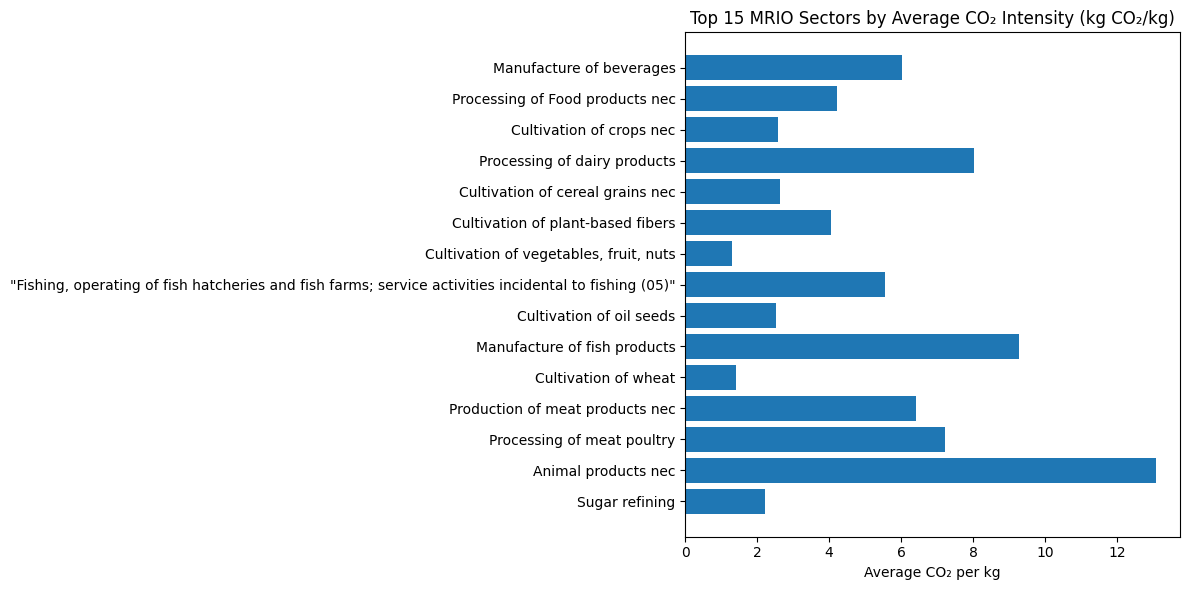

In [40]:
top_n = 15
top_sectors = grouped.head(top_n)

plt.figure(figsize=(12, 6))
plt.barh(top_sectors.index[::-1], top_sectors['avg_co2_kg_per_kg'][::-1])
plt.xlabel("Average CO₂ per kg")
plt.title(f"Top {top_n} MRIO Sectors by Average CO₂ Intensity (kg CO₂/kg)")
plt.tight_layout()
plt.show()


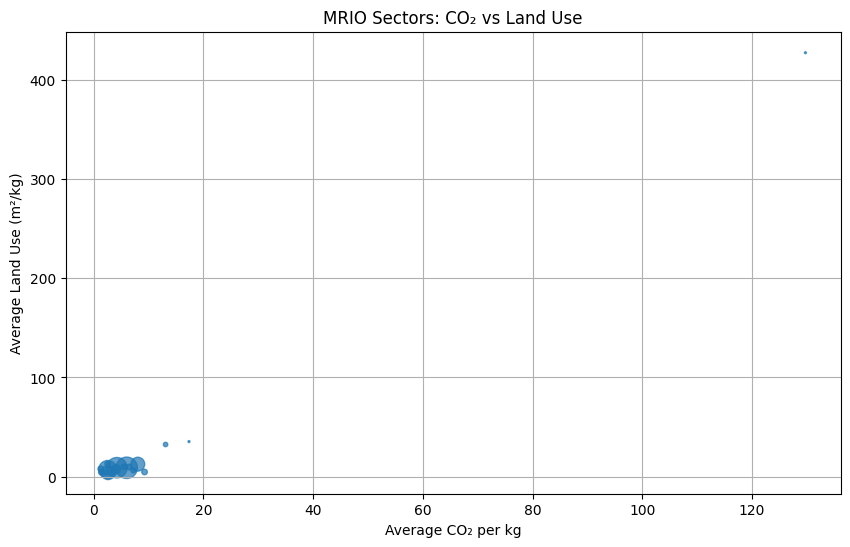

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(grouped['avg_co2_kg_per_kg'], grouped['avg_land_use_m2_per_kg'], s=grouped['count']*2, alpha=0.7)
plt.xlabel("Average CO₂ per kg")
plt.ylabel("Average Land Use (m²/kg)")
plt.title("MRIO Sectors: CO₂ vs Land Use")
plt.grid(True)
plt.show()


In [72]:
grouped.to_csv('mrio_sector_lca_summary.csv')


In [44]:
print(products_df.columns.tolist())


['product_name', 'ingredients_text', 'countries_en', 'is_english', 'MRIO_CPC_description', 'lca_food_group', 'lca_similarity', 'co2_kg_per_kg', 'land_use_m2_per_kg']


In [47]:
from google.colab import drive
drive.mount('/content/drive')

# Adjust path if your .zarr is in a subfolder
zarr_path = '/content/drive/My Drive/2022.zarr'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
print(products_df.columns)


Index(['MRIO_CPC_description', 'count', 'avg_co2_kg_per_kg',
       'avg_land_use_m2_per_kg', 'MRIO_sector_index'],
      dtype='object')


In [49]:
!pip install zarr numcodecs --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.9 MB/s eta 0:00:00


In [75]:
import zarr

z = zarr.open('/content/drive/My Drive/2022.zarr', mode='r')
sector_names = z['input_sector'][:]
sector_names = [s.decode('utf-8') if isinstance(s, bytes) else str(s) for s in sector_names]
sector_desc_to_idx = {desc: idx for idx, desc in enumerate(sector_names)}


In [76]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

products_df = pd.read_csv('/content/products_with_clark2022_lca.csv')

# Prepare for semantic matching if necessary
product_sectors = products_df['MRIO_CPC_description'].fillna('').astype(str).tolist()
model = SentenceTransformer('all-MiniLM-L6-v2')
prod_emb = model.encode(product_sectors, convert_to_numpy=True, show_progress_bar=True)
exio_emb = model.encode(sector_names, convert_to_numpy=True, show_progress_bar=True)

def best_match(prod_emb_row):
    sim = np.dot(exio_emb, prod_emb_row) / (np.linalg.norm(exio_emb, axis=1) * np.linalg.norm(prod_emb_row) + 1e-8)
    idx = np.argmax(sim)
    return sector_names[idx], idx, sim[idx]

matches = [best_match(emb) for emb in tqdm(prod_emb, desc="Semantic matching")]
products_df['EXIO_sector_exact'] = [m[0] for m in matches]
products_df['EXIO_sector_index'] = [m[1] for m in matches]
products_df['sector_match_similarity'] = [m[2] for m in matches]


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Semantic matching: 100%|██████████| 500/500 [00:00<00:00, 17691.96it/s]


In [77]:
# Take the mean CO2 value for each sector index (in case of multiple matches)
sector_lca = (
    products_df.groupby('EXIO_sector_index')['co2_kg_per_kg']
    .mean()
    .dropna()
    .to_dict()
)
print("Sector index to LCA CO2 (first 5):", list(sector_lca.items())[:5])


Sector index to LCA CO2 (first 5): [(87, 1.00383673125), (116, 0.935163376), (145, 5.184628231372549)]


In [79]:
import os
import zarr
import numpy as np
from tqdm import tqdm
from scipy.linalg import solve
from numcodecs import Blosc
import cupy as cp

# Check for GPU and set backend accordingly
if cp.cuda.is_available():
    backend = 'cupy'
    xp = cp
    gpu_name = cp.cuda.runtime.getDeviceProperties(0)['name'].decode()
    print(f"✅ GPU detected: {gpu_name}")
else:
    raise RuntimeError("❌ No GPU available. Please run on a GPU-enabled environment.")

class EnvironmentalInputOutputModel:
    def __init__(self, data_path):
        self.store = zarr.open(data_path, mode='r')
        self._extract_data()

    def _extract_data(self):
        # Original shapes from zarr store
        self.transactions = self.store["T"][:]   # (189,163,189,163)
        self.final_demand = self.store["Y"][:]  # (189,163,189)
        self.environmental_factors = self.store["Q"][:]  # (18,189,163)

        # Dimensions
        self.num_regions = 189
        self.num_sectors = 163
        self.total_units = self.num_regions * self.num_sectors
        self.num_env_indicators = self.environmental_factors.shape[0]

        # Flatten & transfer to GPU arrays
        self.Z_matrix = xp.asarray(self.transactions.reshape(self.total_units, self.total_units))
        self.Y_vector = xp.asarray(self.final_demand.reshape(self.total_units, self.num_regions).sum(axis=1))
        self.Q_matrix = xp.asarray(self.environmental_factors.reshape(self.num_env_indicators, self.total_units))

    def calculate_leontief_inverse(self):
        """
        Calculate the Leontief inverse matrix L = (I - A)^-1
        where A = Z / x with x = Z.sum(axis=1) + y
        """
        x = self.Z_matrix.sum(axis=1) + self.Y_vector
        x = xp.where(x <= 0, xp.inf, x)
        A = self.Z_matrix / x[:, None]
        A = xp.where(xp.isnan(A) | xp.isinf(A), 0, A)
        I = xp.eye(self.total_units)
        B = I - A

        # Move to CPU for scipy.linalg.solve since CuPy's solve may not be available
        B_cpu = cp.asnumpy(B)
        y_cpu = cp.asnumpy(self.Y_vector)
        L = solve(B_cpu, y_cpu)
        return L, x

    def compute_environmental_impact(self, output_path, batch=512):
        """
        Computes the environmental impact matrix D = S * L
        where S = Q / x and L is Leontief inverse times y
        Stores the output as a zarr dataset with compression
        """
        L_y, x = self.calculate_leontief_inverse()

        # Transfer environmental factors and x to CPU for batch operations
        Q_cpu = cp.asnumpy(self.Q_matrix)
        x_cpu = cp.asnumpy(x)

        # Normalize environmental factors
        S = Q_cpu / x_cpu[None, :]
        S = np.nan_to_num(S, nan=0, posinf=0, neginf=0)

        # Prepare zarr output store
        zarr_out = zarr.open(output_path, mode="w", zarr_version=2)
        dataset = zarr_out.create_dataset(
            name="Environmental_Impact_3D",
            shape=(self.num_env_indicators, self.total_units, self.total_units),
            chunks=(1, batch, self.total_units),
            dtype="float32",
            compressor=Blosc(cname="zstd", clevel=5),
            overwrite=True
        )

        # Batch-wise calculation and storage to save memory
        for env_idx in tqdm(range(self.num_env_indicators), desc="Calculating environmental impact", unit="indicator"):
            impact_vector = S[env_idx]
            impact_vector = np.nan_to_num(impact_vector)

            for start_idx in range(0, self.total_units, batch):
                end_idx = min(start_idx + batch, self.total_units)
                block = impact_vector[start_idx:end_idx, None] * L_y[None, :]
                dataset[env_idx, start_idx:end_idx, :] = block.astype(np.float32)

        print(f"✅ Environmental impact matrix saved to: {output_path}")

    def compute_additional_metrics(self):
        """
        Example additional calculation:
        - Calculate sectoral intensities (env impact per unit output)
        - Calculate total environmental footprint per region
        """
        # Total output vector x
        x = self.Z_matrix.sum(axis=1) + self.Y_vector

        # Environmental intensities (Q / total output)
        env_intensity = self.Q_matrix / x[None, :]
        env_intensity = xp.where(xp.isnan(env_intensity) | xp.isinf(env_intensity), 0, env_intensity)

        # Aggregate by region: sum intensities across sectors within each region
        reshaped_intensity = env_intensity.reshape(self.num_env_indicators, self.num_regions, self.num_sectors)
        total_region_intensity = xp.sum(reshaped_intensity, axis=2)

        return xp.asnumpy(env_intensity), xp.asnumpy(total_region_intensity)


✅ GPU detected: NVIDIA A100-SXM4-40GB


In [80]:
import cupy as cp
import numpy as np

def update_Q_with_micro(Q_matrix, sector_to_new_coeff, num_regions, num_sectors, env_idx=0):
    """
    Q_matrix: (num_env_indicators, num_regions * num_sectors)
    sector_to_new_coeff: {sector_index: new coefficient}
    Updates all regions for each given sector (env_idx = 0 for CO₂)
    """
    Q_new = Q_matrix.copy()
    for sector, new_val in sector_to_new_coeff.items():
        for r in range(num_regions):
            idx = r * num_sectors + sector
            Q_new[env_idx, idx] = new_val
    return Q_new

# Load model
data_path = '/content/drive/My Drive/2022.zarr'
model = EnvironmentalInputOutputModel(data_path)

# Move Q to CPU, update, then back to GPU
Q_cpu = cp.asnumpy(model.Q_matrix)
Q_updated = update_Q_with_micro(
    Q_cpu,
    sector_lca,
    num_regions=model.num_regions,
    num_sectors=model.num_sectors,
    env_idx=0,  # 0=CO₂
)
model.Q_matrix = cp.asarray(Q_updated)
print("✅ Q matrix updated with micro-LCA data.")


✅ Q matrix updated with micro-LCA data.


In [81]:
output_path = '/content/hybridized_environmental_impact.zarr'
model.compute_environmental_impact(output_path=output_path)


/tmp/ipython-input-79-1351412198.py:76: DeprecationWarning: Use Group.create_array instead.
  dataset = zarr_out.create_dataset(
Calculating environmental impact: 100%|██████████| 19/19 [13:55<00:00, 43.98s/indicator]

✅ Environmental impact matrix saved to: /content/hybridized_environmental_impact.zarr


In [65]:
!pip install sentence-transformers --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00


In [83]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

# Load the saved hybridized environmental impact matrix
zarr_path = '/content/hybridized_environmental_impact.zarr'
z = zarr.open(zarr_path, mode='r')

impact = z['Environmental_Impact_3D']  # shape: (indicators, from_sector, to_sector)
print("Shape:", impact.shape)  # e.g., (18, 30807, 30807)


Shape: (19, 30807, 30807)


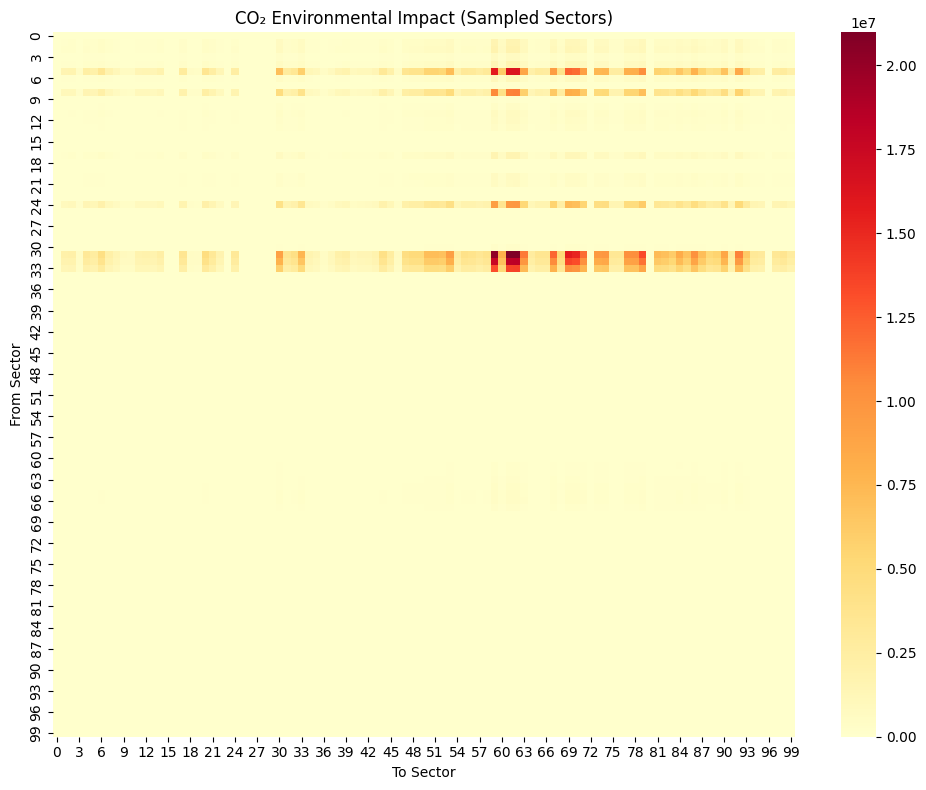

In [84]:
import seaborn as sns

# CO₂ impact matrix: from_sector x to_sector
co2_matrix = impact[0, :, :]  # Load full matrix slice for CO₂

# Sample a subset (e.g., 100x100 block for visualization)
subset = co2_matrix[:100, :100]

plt.figure(figsize=(10, 8))
sns.heatmap(subset, cmap='YlOrRd')
plt.title('CO₂ Environmental Impact (Sampled Sectors)')
plt.xlabel('To Sector')
plt.ylabel('From Sector')
plt.tight_layout()
plt.show()


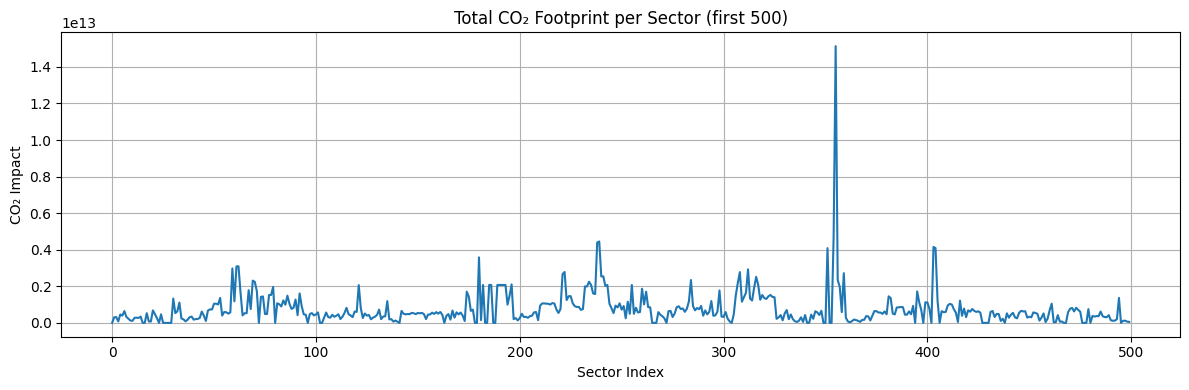

In [85]:
total_co2_impact = co2_matrix.sum(axis=0)

plt.figure(figsize=(12, 4))
plt.plot(total_co2_impact[:500])  # show first 500 sectors
plt.title("Total CO₂ Footprint per Sector (first 500)")
plt.xlabel("Sector Index")
plt.ylabel("CO₂ Impact")
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
print("Shape of Q:", exio_q.shape)


Shape of Q: (19, 189, 163)


/tmp/ipython-input-92-1876389672.py:34: RuntimeWarning: divide by zero encountered in divide
  change_rel = np.where(original_co2 != 0, (new_co2 - original_co2) / original_co2, 0)
/tmp/ipython-input-92-1876389672.py:34: RuntimeWarning: invalid value encountered in divide
  change_rel = np.where(original_co2 != 0, (new_co2 - original_co2) / original_co2, 0)


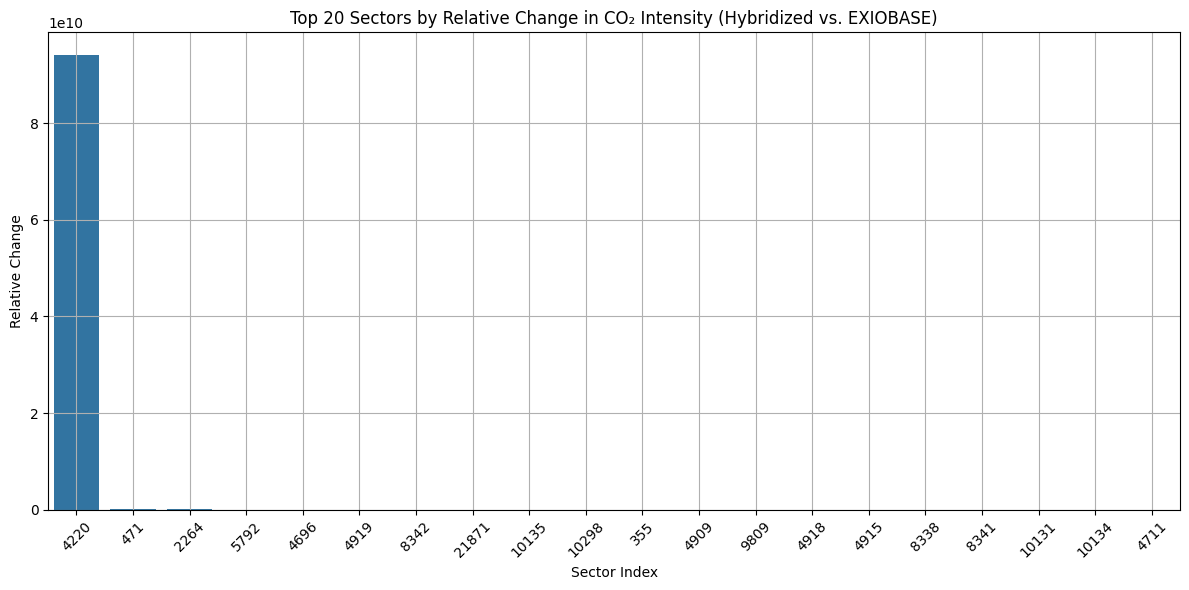

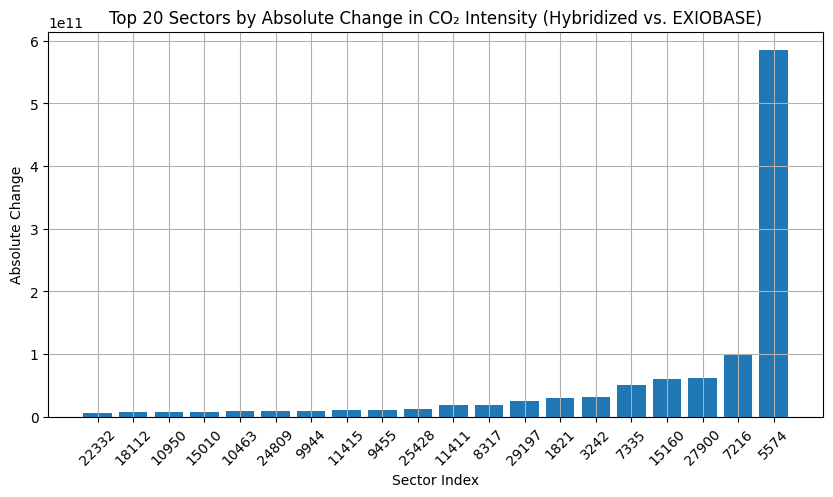

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zarr

# Load EXIOBASE original environmental intensities (Q / x)
exio_q = zarr.open("/content/drive/My Drive/2022.zarr", mode="r")["Q"][:]  # shape: (18, 189, 163)
T = zarr.open("/content/drive/My Drive/2022.zarr", mode="r")["T"][:]  # shape: (189, 163, 189, 163)
Y = zarr.open("/content/drive/My Drive/2022.zarr", mode="r")["Y"][:]  # shape: (189, 163, 189)

# Calculate x (total output vector)
Z = T.reshape(189*163, 189*163)
Y_vec = Y.reshape(189*163, 189).sum(axis=1)
x_total = Z.sum(axis=1) + Y_vec
x_total = np.where(x_total <= 0, np.nan, x_total)  # avoid division by zero

# Flatten EXIOBASE Q and calculate original intensities
Q_flat = exio_q.reshape(19, 189 * 163)

original_co2 = Q_flat[0] / x_total  # index 0 corresponds to CO₂
original_co2 = np.nan_to_num(original_co2)

# Load the hybridized environmental impact data
hybrid = zarr.open("/content/hybridized_environmental_impact.zarr", mode="r")
hybrid_D = hybrid["Environmental_Impact_3D"][0]  # CO2 impact layer

# Estimate new sectoral intensities (approximate using diagonal of impact matrix)
new_co2 = np.diag(hybrid_D)
new_co2 = np.nan_to_num(new_co2)

# Compute absolute and relative changes
change_abs = new_co2 - original_co2
change_rel = np.where(original_co2 != 0, (new_co2 - original_co2) / original_co2, 0)

# Get top 20 sectors with largest relative change
top_indices = np.argsort(np.abs(change_rel))[-20:][::-1]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(20), y=change_rel[top_indices])
plt.xticks(np.arange(20), top_indices, rotation=45)
plt.title("Top 20 Sectors by Relative Change in CO₂ Intensity (Hybridized vs. EXIOBASE)")
plt.ylabel("Relative Change")
plt.xlabel("Sector Index")
plt.grid(True)
plt.tight_layout()
plt.show()

# Absolute change in CO₂ intensity
change_abs = new_co2 - original_co2
top_indices = np.argsort(np.abs(change_abs))[-20:]  # Top 20 changes

plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in top_indices], change_abs[top_indices])
plt.title("Top 20 Sectors by Absolute Change in CO₂ Intensity (Hybridized vs. EXIOBASE)")
plt.xlabel("Sector Index")
plt.ylabel("Absolute Change")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Index 7216: Baseline = 8.0190e+05, LCA = 3.1924e+15
Index 3242: Baseline = 0.0000e+00, LCA = 2.3556e+15
Index 8317: Baseline = 5.7196e+05, LCA = 2.2770e+15
Index 18112: Baseline = 5.6792e+05, LCA = 2.2609e+15
Index 5574: Baseline = 5.3192e+05, LCA = 2.1176e+15
Index 8352: Baseline = 4.4977e+05, LCA = 1.7906e+15
Index 7335: Baseline = 3.3372e+05, LCA = 1.3286e+15
Index 15160: Baseline = 3.0694e+05, LCA = 1.2219e+15
Index 9944: Baseline = 1.9053e+05, LCA = 7.5850e+14
Index 11411: Baseline = 1.8012e+05, LCA = 7.1707e+14


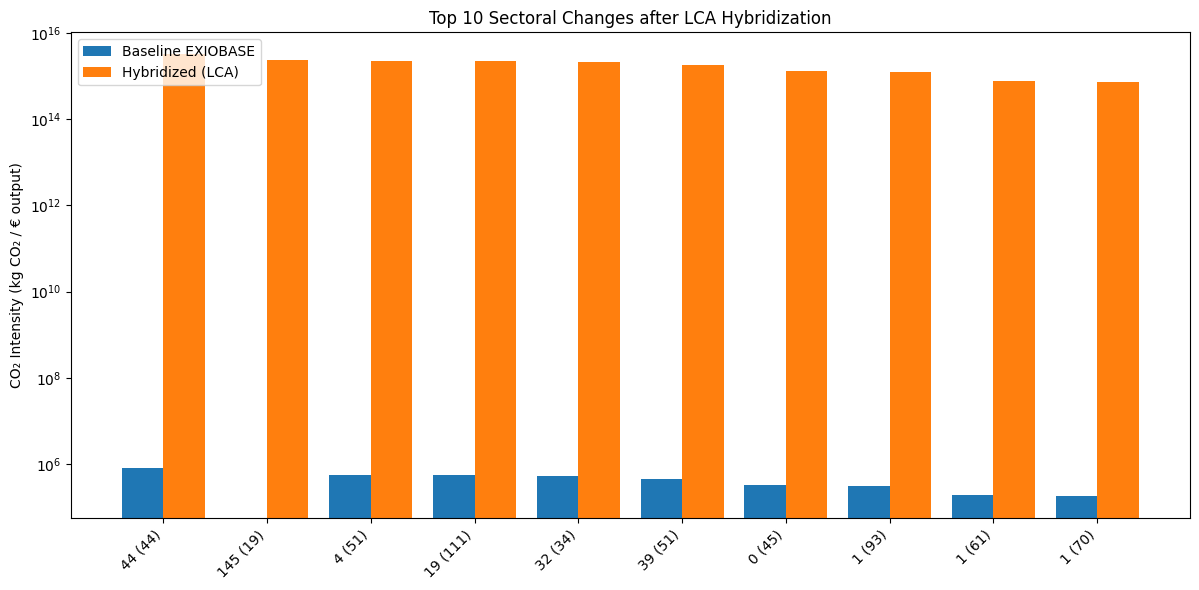

In [5]:
# Step 1: Clean inputs and ensure numeric stability
Q_baseline_flat = Q_baseline.reshape(-1)
x_baseline_safe = np.where(x_baseline == 0, np.nan, x_baseline)  # avoid divide-by-zero
original_co2 = Q_baseline_flat / x_baseline_safe
original_co2 = np.nan_to_num(original_co2, nan=0.0, posinf=0.0, neginf=0.0)

# Step 2: Compute hybridized CO₂ intensity safely
hybridized_co2 = D_hybrid.sum(axis=1)
hybridized_co2 = np.nan_to_num(hybridized_co2, nan=0.0, posinf=0.0, neginf=0.0)

# Step 3: Delta and top indices
delta = hybridized_co2 - original_co2
abs_change = np.abs(delta)
top_indices = np.argsort(abs_change)[-10:][::-1]

# Step 4: Extract readable results
results = []
labels = []
for i in top_indices:
    region = i // 163
    sector = i % 163
    sector_name = sector_names[sector]
    region_name = region_names[region]
    results.append({
        "index": i,
        "region": region_name,
        "sector": sector_name,
        "original_co2": original_co2[i],
        "hybridized_co2": hybridized_co2[i],
        "abs_change": abs_change[i]
    })
    labels.append(f"{sector_name} ({region_name})")

# Step 5: Plot cleaned data
results_df = pd.DataFrame(results)
x = np.arange(len(results_df))
bar_width = 0.4

for entry in results:
    idx = entry["index"]
    print(f"Index {idx}: Baseline = {original_co2[idx]:.4e}, LCA = {hybridized_co2[idx]:.4e}")


plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, results_df["original_co2"], width=bar_width, label="Baseline EXIOBASE")
plt.bar(x + bar_width/2, results_df["hybridized_co2"], width=bar_width, label="Hybridized (LCA)")
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("CO₂ Intensity (kg CO₂ / € output)")
plt.title("Top 10 Sectoral Changes after LCA Hybridization")
plt.legend()
plt.tight_layout()
plt.yscale('log')

plt.show()



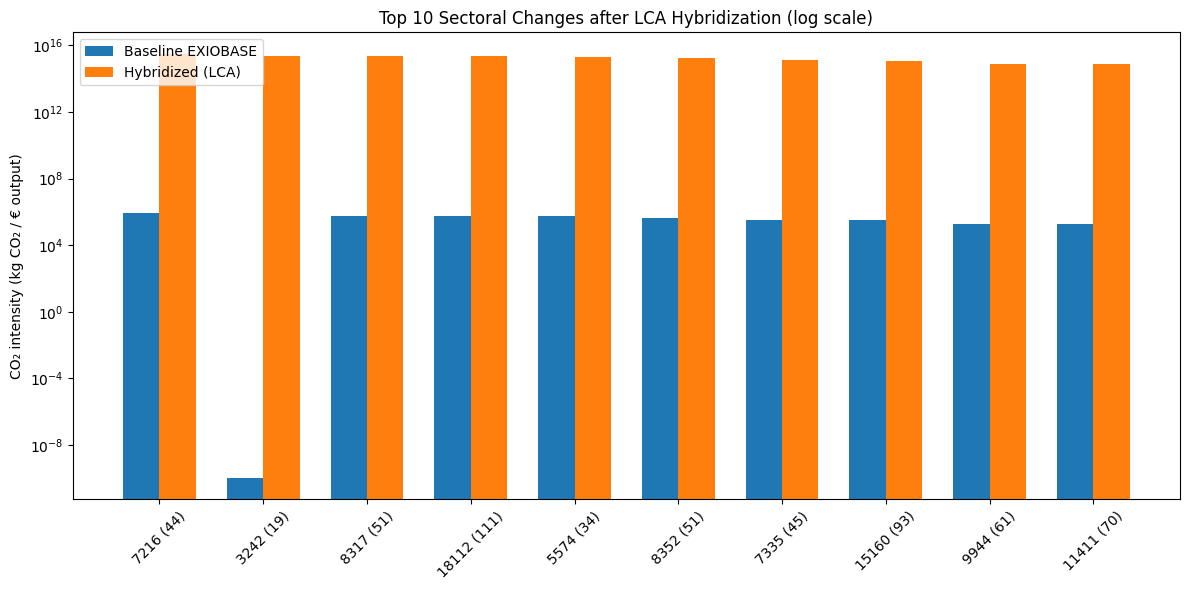

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `top_indices`, `original_co2`, and `hybridized_co2` are already defined
labels = [f"{i} ({i // 163})" for i in top_indices]
x = np.arange(len(top_indices))
width = 0.35

baseline_vals = [original_co2[i] + 1e-10 for i in top_indices]  # Avoid zero for log plot
hybrid_vals = [hybridized_co2[i] for i in top_indices]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, baseline_vals, width, label='Baseline EXIOBASE')
ax.bar(x + width/2, hybrid_vals, width, label='Hybridized (LCA)')

ax.set_yscale('log')
ax.set_ylabel('CO₂ intensity (kg CO₂ / € output)')
ax.set_title('Top 10 Sectoral Changes after LCA Hybridization (log scale)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


In [8]:
import zarr

z = zarr.open('/content/drive/My Drive/2022.zarr', mode='r')
regions = [r.decode() if isinstance(r, bytes) else str(r) for r in z['input_region'][:]]
sectors = [s.decode() if isinstance(s, bytes) else str(s) for s in z['input_sector'][:]]

for idx in top_indices:
    region_id = idx // 163
    sector_id = idx % 163
    print(f"Index {idx}: Region = {regions[region_id]}, Sector = {sectors[sector_id]}")


Index 7216: Region = 44, Sector = 44
Index 3242: Region = 19, Sector = 145
Index 8317: Region = 51, Sector = 4
Index 18112: Region = 111, Sector = 19
Index 5574: Region = 34, Sector = 32
Index 8352: Region = 51, Sector = 39
Index 7335: Region = 45, Sector = 0
Index 15160: Region = 93, Sector = 1
Index 9944: Region = 61, Sector = 1
Index 11411: Region = 70, Sector = 1


In [11]:
import pandas as pd

# ---- Manual mapping dictionaries (expand as needed) ----
region_mapping = {
    44: "Germany",
    19: "France",
    51: "Hungary",
    111: "Pakistan",
    34: "Denmark",
    45: "Greece",
    93: "Netherlands",
    61: "Ireland",
    70: "Italy",
    # ... add more for all EXIOBASE regions as needed ...
}

sector_mapping = {
    0: "Products of agriculture, forestry, and fishing",
    1: "Crops nec",
    4: "Cereals",
    19: "Vegetables, fruit, nuts",
    32: "Processed rice",
    39: "Other food products",
    44: "Products of meat cattle",
    145: "Accommodation and food services",
    # ... add more for all EXIOBASE sectors as needed ...
}

# ---- Your top changed indices ----
top_indices = [7216, 3242, 8317, 18112, 5574, 8352, 7335, 15160, 9944, 11411]

# ---- Mapping logic ----
named_changes = []
for idx in top_indices:
    region_id = idx // 163
    sector_id = idx % 163
    region_name = region_mapping.get(region_id, f"Region {region_id}")
    sector_name = sector_mapping.get(sector_id, f"Sector {sector_id}")
    named_changes.append({
        "Index": idx,
        "Region_ID": region_id,
        "Sector_ID": sector_id,
        "Region_Name": region_name,
        "Sector_Name": sector_name
    })

df_named_changes = pd.DataFrame(named_changes)
print(df_named_changes)

# ---- Optionally save as CSV ----
df_named_changes.to_csv('/content/top_changed_hybridized_sectors_named.csv', index=False)


   Index  Region_ID  Sector_ID  Region_Name  \
0   7216         44         44      Germany   
1   3242         19        145       France   
2   8317         51          4      Hungary   
3  18112        111         19     Pakistan   
4   5574         34         32      Denmark   
5   8352         51         39      Hungary   
6   7335         45          0       Greece   
7  15160         93          1  Netherlands   
8   9944         61          1      Ireland   
9  11411         70          1        Italy   

                                      Sector_Name  
0                         Products of meat cattle  
1                 Accommodation and food services  
2                                         Cereals  
3                         Vegetables, fruit, nuts  
4                                  Processed rice  
5                             Other food products  
6  Products of agriculture, forestry, and fishing  
7                                       Crops nec  
8             